# Predicting the SOH of Batteries Using Deep Learning

In [0]:
!pip show tensorflow
!wget -cq https://ti.arc.nasa.gov/c/5 -O naza.zip
!unzip -qqo naza.zip -d battery_data

## 01. Import Library

In [0]:
import datetime
import numpy as np
import pandas as pd
from scipy.io import loadmat
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

## 02. Make Dictionary

In [0]:
def load_data(battery):
  mat = loadmat('battery_data/' + battery + '.mat')
  print('Total data in dataset: ', len(mat[battery][0, 0]['cycle'][0]))
  counter = 0
  dataset = []
  capacity_data = []
  
  for i in range(len(mat[battery][0, 0]['cycle'][0])):
    row = mat[battery][0, 0]['cycle'][0, i]
    if row['type'][0] == 'discharge':
      ambient_temperature = row['ambient_temperature'][0][0]
      date_time = datetime.datetime(int(row['time'][0][0]),
                               int(row['time'][0][1]),
                               int(row['time'][0][2]),
                               int(row['time'][0][3]),
                               int(row['time'][0][4])) + datetime.timedelta(seconds=int(row['time'][0][5]))
      data = row['data']
      capacity = data[0][0]['Capacity'][0][0]
      for j in range(len(data[0][0]['Voltage_measured'][0])):
        voltage_measured = data[0][0]['Voltage_measured'][0][j]
        current_measured = data[0][0]['Current_measured'][0][j]
        temperature_measured = data[0][0]['Temperature_measured'][0][j]
        current_load = data[0][0]['Current_load'][0][j]
        voltage_load = data[0][0]['Voltage_load'][0][j]
        time = data[0][0]['Time'][0][j]
        dataset.append([counter + 1, ambient_temperature, date_time, capacity,
                        voltage_measured, current_measured,
                        temperature_measured, current_load,
                        voltage_load, time])
      capacity_data.append([counter + 1, ambient_temperature, date_time, capacity])
      counter = counter + 1
 
  print(dataset[0])
  return [pd.DataFrame(data=dataset,
                       columns=['cycle', 'ambient_temperature', 'date_time',
                                'capacity', 'voltage_measured', 'current_measured', 'temperature_measured',
                                'current_load', 'voltage_load', 'time']),
          pd.DataFrame(data=capacity_data,
                       columns=['cycle', 'ambient_temperature', 'date_time', 'capacity'])]

dataset, capacity = load_data('B0005')
pd.set_option('display.max_columns', 10)
dataset.describe()

,cycle,ambient_temperature,capacity,voltage_measured,current_measured,temperature_measured,current_load,voltage_load,time
count,50285.000000,50285.0,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000,50285.000000
mean,88.125942,24.0,1.560345,3.515268,-1.806032,32.816991,1.362700,2.308406,1546.208924
std,45.699687,0.0,0.182380,0.231778,0.610502,3.987515,1.313698,0.800300,906.640295
min,1.000000,24.0,1.287453,2.455679,-2.029098,23.214802,-1.998400,0.000000,0.000000
25%,50.000000,24.0,1.386229,3.399384,-2.013415,30.019392,1.998000,2.388000,768.563000
50%,88.000000,24.0,1.538237,3.511664,-2.012312,32.828944,1.998200,2.533000,1537.031000
75%,127.000000,24.0,1.746871,3.660903,-2.011052,35.920887,1.998200,2.690000,2305.984000
max,168.000000,24.0,1.856487,4.222920,0.007496,41.450232,1.998400,4.238000,3690.234000


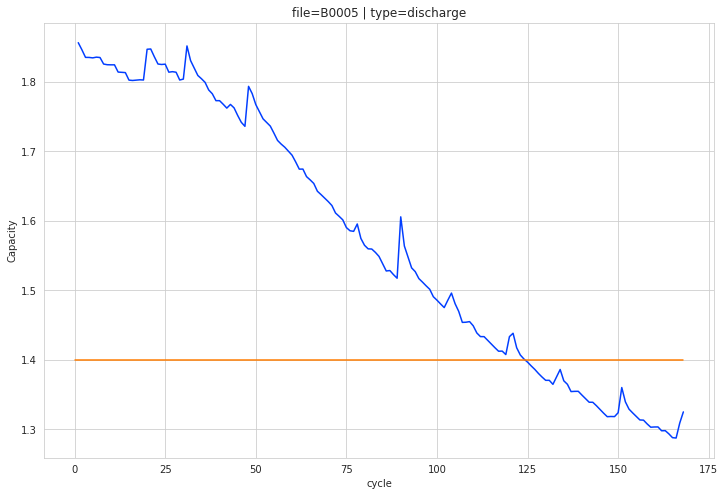

In [0]:
plot_df = capacity.loc[(capacity['cycle']>=1),['cycle','capacity']]
sns.set_style("whitegrid")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('bright')
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['capacity'])
#Draw threshold
plt.plot([0.,len(capacity)], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('file=B0005 | type=discharge')

In [0]:
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SOH']=(dis_ele['capacity'])/C
print(dis_ele.head(5))

cycle datetime capacity SoH
0 1 2008-04-02 15:25:41 1.856487 1.000000
1 2 2008-04-02 19:43:48 1.846327 0.994527
2 3 2008-04-03 00:01:06 1.835349 0.988614
3 4 2008-04-03 04:16:37 1.835263 0.988567
4 5 2008-04-03 08:33:25 1.834646 0.988235

In [0]:
dis_ele.describe()

,cycle,capacity,SoH
count,168.000000,168.000000,168.000000
mean,84.500000,1.572502,0.847031
std,48.641546,0.190413,0.102566
min,1.000000,1.287453,0.693488
25%,42.750000,1.390021,0.748737
50%,84.500000,1.557085,0.838727
75%,126.250000,1.769163,0.952962
max,168.000000,1.856487,1.000000


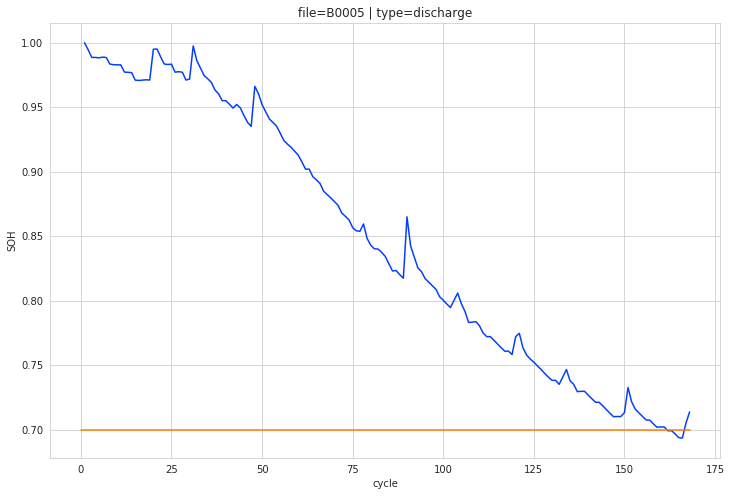

In [0]:
plot_df = dis_ele.loc[(dis_ele['cycle']>=1),['cycle','SoH']]
sns.set_style("whitegrid")
#deep, muted, pastel, bright, dark, colorblind
sns.set_palette('bright')
plt.figure(figsize=(12, 8))
plt.plot(plot_df['cycle'], plot_df['SoH'])
#Draw threshold
plt.plot([0.,len(capacity)], [0.70, 0.70])
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('file=B0005 | type=discharge')

In [0]:
C = dataset['capacity'][0]
soh = []
for i in range(len(dataset)):
  soh.append([dataset['capacity'][i] / C])
soh = pd.DataFrame(data=soh, columns=['SoH'])

attribs=['capacity', 'voltage_measured', 'current_measured',
         'temperature_measured', 'current_load', 'voltage_load', 'time']
train_dataset = dataset[attribs]
sc = MinMaxScaler(feature_range=(0,1))
train_dataset = sc.fit_transform(train_dataset)
print(train_dataset.shape)
print(soh.shape)

(50285, 7)
(50285, 1)

ADAM optimizer

In [0]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import LSTM
from tensorflow.keras.optimizers import Adam

## LSTM-Based Modeling

In [0]:
model = Sequential()
model.add(Dense(8, activation='relu', input_dim=train_dataset.shape[1]))
model.add(Dense(8, activation='relu'))
model.add(Dense(8, activation='relu'))
model.add(Dropout(rate=0.25))
model.add(Dense(1))
model.summary()
model.compile(optimizer=Adam(beta_1=0.9, beta_2=0.999, epsilon=1e-08), loss='mean_absolute_error')

Model: "sequential_3"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
dense_9 (Dense) (None, 8) 64 
_________________________________________________________________
dense_10 (Dense) (None, 8) 72 
_________________________________________________________________
dense_11 (Dense) (None, 8) 72 
_________________________________________________________________
dropout_6 (Dropout) (None, 8) 0 
_________________________________________________________________
dense_12 (Dense) (None, 1) 9 
=================================================================
Total params: 217
Trainable params: 217
Non-trainable params: 0
_________________________________________________________________

Train Model

In [0]:
model.fit(x=train_dataset, y=soh.to_numpy(), batch_size=25, epochs=50)

Epoch 1/50
 1/2012 [..............................] - ETA: 0s - loss: 0.0209 91/2012 [>.............................] - ETA: 1s - loss: 0.0223 189/2012 [=>............................] - ETA: 0s - loss: 0.0206 290/2012 [===>..........................] - ETA: 0s - loss: 0.0211 392/2012 [====>.........................] - ETA: 0s - loss: 0.0214 493/2012 [======>.......................] - ETA: 0s - loss: 0.0216 594/2012 [=======>......................] - ETA: 0s - loss: 0.0218 685/2012 [=========>....................] - ETA: 0s - loss: 0.0220 786/2012 [==========>...................] - ETA: 0s - loss: 0.0219 888/2012 [============>.................] - ETA: 0s - loss: 0.0221 989/2012 [=============>................] - ETA: 0s - loss: 0.02211087/2012 [===============>..............] - ETA: 0s - loss: 0.02221187/2012 [================>.............] - ETA: 0s - loss: 0.02211286/2012 [==================>...........] - ETA: 0s - loss: 0.02221378/2012 [===================>..........] - ETA: 0s - loss: 0.02221478/2012 [=====================>........] - ETA: 0s - loss: 0.02211574/2012 [======================>.......] - ETA: 0s - loss: 0.02221672/2012 [=======================>......] - ETA: 0s - loss: 0.02231773/2012 [=========================>....] - ETA: 0s - loss: 0.02231873/2012 [==========================>...] - ETA: 0s - loss: 0.02221970/2012 [============================>.] - ETA: 0s - loss: 0.02232012/2012 [==============================] - 1s 510us/step - loss: 0.0223
Epoch 2/50
 1/2012 [..............................] - ETA: 0s - loss: 0.0247 101/2012 [>.............................] - ETA: 0s - loss: 0.0232 202/2012 [==>...........................] - ETA: 0s - loss: 0.0228 298/2012 [===>..........................] - ETA: 0s - loss: 0.0227 399/2012 [====>.........................] - ETA: 0s - loss: 0.0228 500/2012 [======>.......................] - ETA: 0s - loss: 0.0227 596/2012 [=======>......................] - ETA: 0s - loss: 0.0227 695/2012 [=========>....................] - ETA: 0s - loss: 0.0227

## Test Model SoH Prediction
B0006

In [0]:
dataset_val, capacity_val = load_data('B0006')
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity_val[attrib]
C = dis_ele['capacity'][0]
for i in range(len(dis_ele)):
    dis_ele['SoH']=(dis_ele['capacity']) / C
print(dataset_val.head(5))
print(dis_ele.head(5))

Total data in dataset: 616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 2.035337591005598, 4.179799607333447, -0.0023663271409738672, 24.277567510331888, -0.0006, 0.0, 0.0]
 cycle ambient_temperature date_time capacity voltage_measured \
0 1 24 2008-04-02 15:25:41 2.035338 4.179800 
1 1 24 2008-04-02 15:25:41 2.035338 4.179823 
2 1 24 2008-04-02 15:25:41 2.035338 3.966528 
3 1 24 2008-04-02 15:25:41 2.035338 3.945886 
4 1 24 2008-04-02 15:25:41 2.035338 3.930354 

 current_measured temperature_measured current_load voltage_load time 
0 -0.002366 24.277568 -0.0006 0.000 0.000 
1 0.000434 24.277073 -0.0006 4.195 16.781 
2 -2.014242 24.366226 -1.9990 3.070 35.703 
3 -2.008730 24.515123 -1.9990 3.045 53.781 
4 -2.013381 24.676053 -1.9990 3.026 71.922 
 cycle date_time capacity SoH
0 1 2008-04-02 15:25:41 2.035338 1.000000
1 2 2008-04-02 19:43:48 2.025140 0.994990
2 3 2008-04-03 00:01:06 2.013326 0.989185
3 4 2008-04-03 04:16:37 2.013285 0.989165
4 5 2008-04-03 08:33:25 2.000528 0.982898

In [0]:
attrib=['capacity', 'voltage_measured', 'current_measured',
        'temperature_measured', 'current_load', 'voltage_load', 'time']
soh_pred = model.predict(sc.fit_transform(dataset_val[attrib]))
print(soh_pred.shape)

C = dataset_val['capacity'][0]
soh = []
for i in range(len(dataset_val)):
  soh.append(dataset_val['capacity'][i] / C)
new_soh = dataset_val.loc[(dataset_val['cycle'] >= 1), ['cycle']]
new_soh['SoH'] =  soh
new_soh['NewSoH'] = soh_pred
new_soh = new_soh.groupby(['cycle']).mean().reset_index()
print(new_soh.head(10))
rms = np.sqrt(mean_squared_error(new_soh['SoH'], new_soh['NewSoH']))
print('Root Mean Square Error: ', rms)

(50285, 1)
 cycle SoH NewSoH
0 1 1.000000 0.995324
1 2 0.994990 0.991911
2 3 0.989185 0.987930
3 4 0.989165 0.987910
4 5 0.982898 0.983594
5 6 0.989467 0.988103
6 7 0.989075 0.987832
7 8 0.967304 0.972861
8 9 0.966997 0.972645
9 10 0.961625 0.968950
Root Mean Square Error: 0.08973622582803582

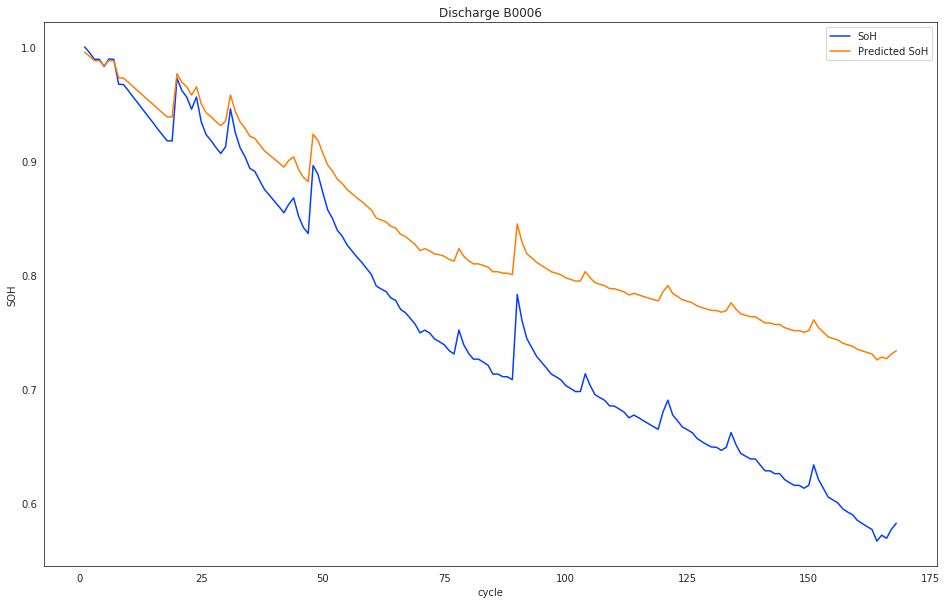

In [0]:
plot_df = new_soh.loc[(new_soh['cycle']>=1),['cycle','SoH', 'NewSoH']]
sns.set_style("white")
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['SoH'], label='SoH')
plt.plot(plot_df['cycle'], plot_df['NewSoH'], label='Predicted SoH')
#Draw threshold
#plt.plot([0.,len(capacity)], [0.70, 0.70], label='Threshold')
plt.ylabel('SOH')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('Discharge B0006')

In [0]:
dataset_val, capacity_val = load_data('B0005')
attrib=['cycle', 'date_time', 'capacity']
dis_ele = capacity_val[attrib]
rows=['cycle','capacity']
dataset=dis_ele[rows]
data_train=dataset[(dataset['cycle']<50)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=50)]
data_set_test=data_test.iloc[:,1:2].values

sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
#take the last 10t to predict 10t+1
for i in range(10,49):
    X_train.append(data_set_train[i-10:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

Total data in dataset: 616
[1, 24, datetime.datetime(2008, 4, 2, 15, 25, 41), 1.8564874208181574, 4.191491807505295, -0.004901589207462691, 24.330033885570543, -0.0006, 0.0, 0.0]

In [0]:
regress = Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))
regress.add(LSTM(units=200))
regress.add(Dropout(0.3))
regress.add(Dense(units=1))
regress.compile(optimizer='adam',loss='mean_squared_error')
regress.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type) Output Shape Param # 
=================================================================
lstm_8 (LSTM) (None, 10, 200) 161600 
_________________________________________________________________
dropout_11 (Dropout) (None, 10, 200) 0 
_________________________________________________________________
lstm_9 (LSTM) (None, 10, 200) 320800 
_________________________________________________________________
dropout_12 (Dropout) (None, 10, 200) 0 
_________________________________________________________________
lstm_10 (LSTM) (None, 10, 200) 320800 
_________________________________________________________________
dropout_13 (Dropout) (None, 10, 200) 0 
_________________________________________________________________
lstm_11 (LSTM) (None, 200) 320800 
_________________________________________________________________
dropout_14 (Dropout) (None, 200) 0 
_________________________________________________________________
dense_14 (Dense) (None, 1) 201 
=================================================================
Total params: 1,124,201
Trainable params: 1,124,201
Non-trainable params: 0
_________________________________________________________________

In [0]:
regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
1/2 [==============>...............] - ETA: 0s - loss: 0.35072/2 [==============================] - 0s 22ms/step - loss: 0.3227
Epoch 2/200
1/2 [==============>...............] - ETA: 0s - loss: 0.16742/2 [==============================] - 0s 20ms/step - loss: 0.1258
Epoch 3/200
1/2 [==============>...............] - ETA: 0s - loss: 0.13372/2 [==============================] - 0s 21ms/step - loss: 0.1131
Epoch 4/200
1/2 [==============>...............] - ETA: 0s - loss: 0.03402/2 [==============================] - 0s 21ms/step - loss: 0.0458
Epoch 5/200
1/2 [==============>...............] - ETA: 0s - loss: 0.07262/2 [==============================] - 0s 22ms/step - loss: 0.0828
Epoch 6/200
1/2 [==============>...............] - ETA: 0s - loss: 0.06422/2 [==============================] - 0s 20ms/step - loss: 0.0614
Epoch 7/200
1/2 [==============>...............] - ETA: 0s - loss: 0.04592/2 [==============================] - 0s 18ms/step - loss: 0.0493
Epoch 8/200
1/2 [==============>...............] - ETA: 0s - loss: 0.06582/2 [==============================] - 0s 18ms/step - loss: 0.0585
Epoch 9/200
1/2 [==============>...............] - ETA: 0s - loss: 0.04442/2 [==============================] - 0s 17ms/step - loss: 0.0448
Epoch 10/200
1/2 [==============>...............] - ETA: 0s - loss: 0.03432/2 [==============================] - 0s 18ms/step - loss: 0.0490
Epoch 11/200
1/2 [==============>...............] - ETA: 0s - loss: 0.03082/2 [==============================] - 0s 17ms/step - loss: 0.0458
Epoch 12/200
1/2 [==============>...............] - ETA: 0s - loss: 0.05892/2 [==============================] - 0s 18ms/step - loss: 0.0494
Epoch 13/200
1/2 [==============>...............] - ETA: 0s - loss: 0.04922/2 [==============================] - 0s 17ms/step - loss: 0.0476
Epoch 14/200
1/2 [==============>...............] - ETA: 0s - loss: 0.03682/2 [==============================] - 0s 17ms/step - loss: 0.0430
Epoch 15/200
1/2 [==============>...............] - ETA: 0s - loss: 0.04802/2 [==============================] - 0s 17ms/step - loss: 0.0449
Epoch 16/200
1/2 [==============>...............] - ETA: 0s - loss: 0.03892/2 [==============================] - 0s 15ms/step - loss: 0.0430
Epoch 17/200
1/2 [==============>...............] - ETA: 0s - loss: 0.04442/2 [==============================] - 0s 18ms/step - loss: 0.0444
Epoch 18/200
1/2 [==============>...............] - ETA: 0s - loss: 0.05312/2 [==============================] - 0s 17ms/step - loss: 0.0457
Epoch 19/200
1/2 [==============>...............] - ETA: 0s - loss: 0.05412/2 [==============================] - 0s 15ms/step - loss: 0.0462
Epoch 20/200
1/2 [==============>...............] - ETA: 0s - loss: 0.0393

In [0]:
print(len(data_test))
data_total=pd.concat((data_train['capacity'], data_test['capacity']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-10:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

119

In [0]:
X_test=[]
for i in range(10,129):
    X_test.append(inputs[i-10:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))
pred=regress.predict(X_test)
print(pred.shape)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]
rmse = np.sqrt(mean_squared_error(tests, pred))
print('Test RMSE: %.3f' % rmse)
metrics.r2_score(tests,pred)

(119, 1)
Test RMSE: 0.046
Out[72]: 0.8845595669979891

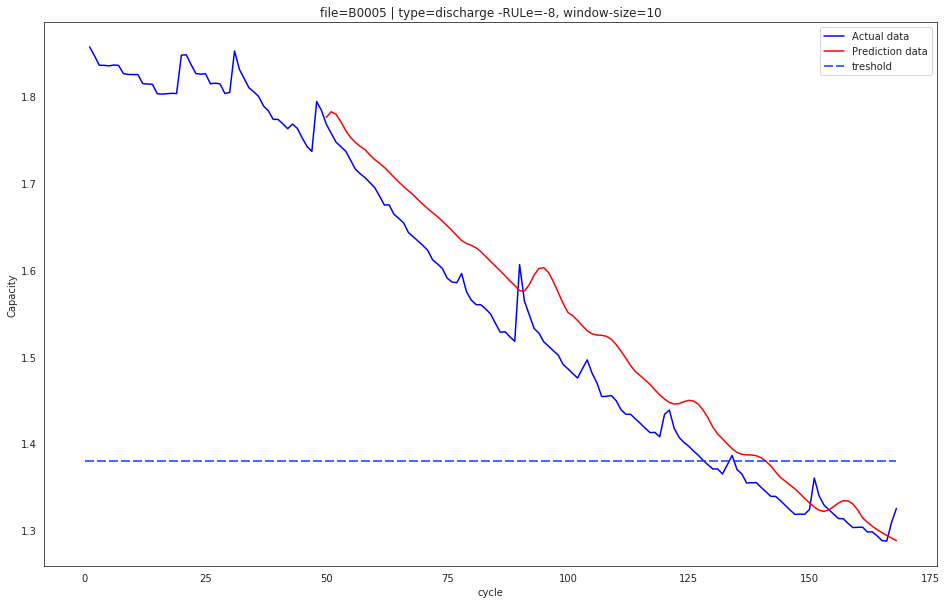

In [0]:
ln = len(data_train)
data_test['pre']=pred
plot_df = dataset.loc[(dataset['cycle']>=1),['cycle','capacity']]
plot_per = data_test.loc[(data_test['cycle']>=ln),['cycle','pre']]
plt.figure(figsize=(16, 10))
plt.plot(plot_df['cycle'], plot_df['capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['pre'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.38, 1.38],dashes=[6, 2], label="treshold")
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.legend()
plt.title('file=B0005 | type=discharge -RULe=-8, window-size=10')

In [0]:
pred=0
Afil=0
Pfil=0
a=data_test['capacity'].values
b=data_test['pre'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<=1.38:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.38:
        k=i
        Pfil=k
        break
print("Actual Fail at Cycle Number: "+ str(Afil+ln))
print("Prediction Fail at Cycle Number: "+ str(Pfil+ln))
RULerror=Pfil-Afil
print("Error of RUL= "+ str(RULerror)+ " Cycles")

Actual Fail at Cycle Number: 128
Prediction Fail at Cycle Number: 64
Error of RUL= -64 Cycles